# Analysis for the learning of the 2D dynamics with constant wind and the attack angle (alpha) as only state

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from matplotlib import gridspec
import matplotlib.animation as animation
#import seaborn as sns
plt.rcParams["figure.figsize"] = (10,7)

alphas = [-8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
alphas1 = [-8, -6, -4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 19, 20]
n_alphas = len(alphas)
n_actions = 3

fs = 15
title_fs = 18
legend_fs = 12
label_fs = 16
ticks_fs = 14

In [2]:
cQ = pd.read_csv("cQ_matrix_newcoeff.txt")
pQ = pd.read_csv("pQ_matrix_newcoeff.txt")

crew = pd.read_csv("crewards_newcoeff.txt")
prew = pd.read_csv("prewards_newcoeff.txt")

cpol = pd.read_csv("cpolicy_newcoeff.txt")
ppol = pd.read_csv("ppolicy_newcoeff.txt")

cout = pd.read_csv("cout_newcoeff.txt")
pout = pd.read_csv("pout_newcoeff.txt")

cQ_count = pd.read_csv("cQ_counter_newcoeff.txt")
pQ_count = pd.read_csv("pQ_counter_newcoeff.txt")

In [3]:
changes_cart = [0] + [idx for idx, (i, j) in enumerate(zip(crew['Alpha'], crew['Alpha'][1:]), 1) if i != j]
print(changes_cart)
print(crew.Alpha.unique())

changes_cart = [0] + [idx for idx, (i, j) in enumerate(zip(crew['epsilon'], crew['epsilon'][1:]), 1) if i != j]
print(changes_cart)
print(crew.epsilon.unique())

[0, 12500]
[0.1  0.01]
[0, 12500, 25000, 30000, 49999]
[0.1    0.05   0.01   0.0001 0.    ]


## 1) Q matrix

In [4]:
pQ.tail(4)

,episode,alpha_idx,action_0,action_1,action_2
6011,49999,11,198.872806,198.518549,208.468190
6012,49999,12,199.472039,199.968062,208.248315
6013,49999,13,200.034237,200.934004,207.710568
6014,49999,14,206.721224,206.970455,0.000000


In [5]:
print(crew.Alpha.unique())
[0] + [idx for idx, (i, j) in enumerate(zip(crew['Alpha'], crew['Alpha'][1:]), 1) if i != j]

[0.1  0.01]


[0, 12500]

In [6]:
print(crew.epsilon.unique())
[0] + [idx for idx, (i, j) in enumerate(zip(crew['epsilon'], crew['epsilon'][1:]), 1) if i != j]

[0.1    0.05   0.01   0.0001 0.    ]


[0, 12500, 25000, 30000, 49999]

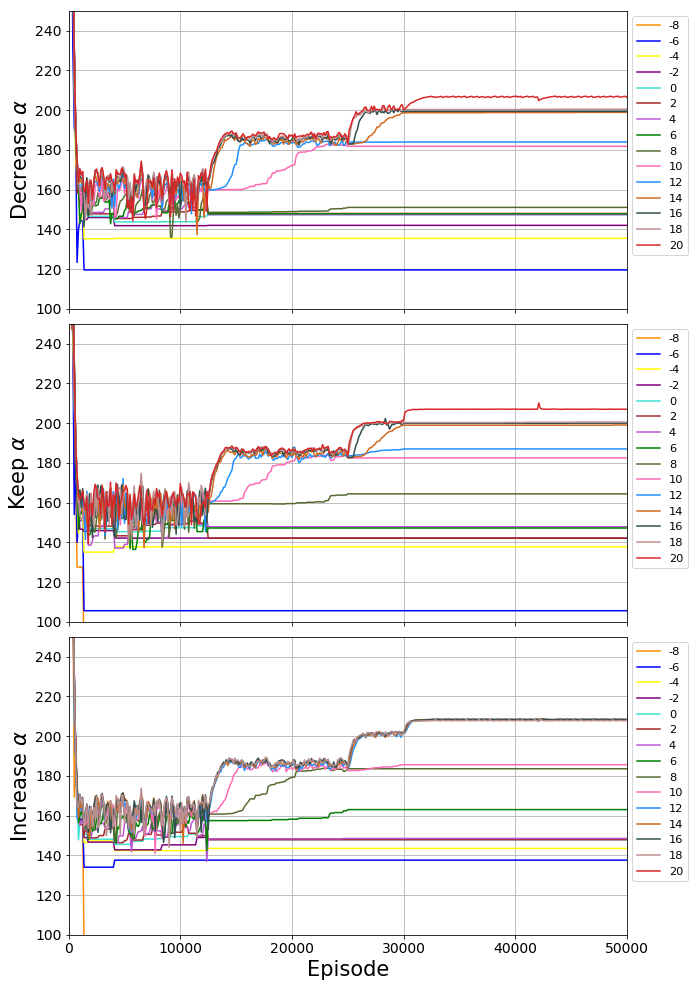

In [7]:
fig, axs = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(10, 17), gridspec_kw={'wspace': 0, 'hspace':0.05})
(ax1, ax2, ax3) = axs
ep_max = cQ['episode'].max()

actions = ['action_0', 'action_1', 'action_2']

#sns.set()

#colors = cm.prism(np.linspace(0, 1, n_alphas)) # prism

#fig.suptitle("Q entry values for each alpha, for actions 0, 1, 2 ", fontsize = title_fs)

colors = ['darkorange', 'rosybrown', 'yellow', 'purple', 'turquoise', 'brown', 'mediumorchid', 'chocolate', 'darkolivegreen', \
         'hotpink', 'dodgerblue', 'green', 'darkslategrey', 'red', 'royalblue']

colors1 = ['darkorange', 'blue', 'yellow', 'purple', 'turquoise', 'brown', 'mediumorchid', 'green', 'darkolivegreen', \
         'hotpink', 'dodgerblue', 'chocolate', 'darkslategrey', 'rosybrown', 'tab:red','royalblue']

for alph in range(0,len(alphas)):
    
    df = cQ.loc[cQ['alpha_idx'] == alph]

    ax1.plot(df['episode'], df['action_0'], label = str(alphas[alph]), color = colors1[alph])
    ax2.plot(df['episode'], df['action_1'], label = str(alphas[alph]), color = colors1[alph])
    ax3.plot(df['episode'], df['action_2'], label = str(alphas[alph]), color = colors1[alph])
    
    ax1.set_xlim(0,50000)
    ax1.set_xticks([0, 10000, 20000, 30000, 40000, 50000])
    
    """ax11 = ax1.twiny()
    ax11.set_xlim(ax1.get_xlim())
    ax11.set_xticks([0, 2500, 5000, 7500, 10000])
    ax11.set_xticklabels([0.1, 0.1, 0.01, 0.001, 0.001])
    ax11.set_xlabel(r'Learning rate $\eta$')
    """
    ax1.set_ylabel(r'Decrease $\alpha$', fontsize = label_fs+5)
    ax2.set_ylabel(r'Keep $\alpha$', fontsize = label_fs+5)
    ax3.set_ylabel(r'Increase $\alpha$', fontsize = label_fs+5)
    
    ax1.set_ylim(100,250)
    
    ax1.grid(b=True)
    ax2.grid(b=True)
    ax3.grid(b=True)
    
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax2.tick_params(axis='both', which='major', labelsize=14)
    ax3.tick_params(axis='both', which='major', labelsize=14)
    
    ax1.legend(bbox_to_anchor=(1., 1.), fontsize=11.4)
    ax2.legend(bbox_to_anchor=(1., 1.), fontsize=11.4)
    ax3.legend(bbox_to_anchor=(1., 1.), fontsize=11.4)
    
    ax3.set_xlabel('Episode', fontsize = label_fs+5)
    
#fig.savefig('growingmatrix-2d-const-wind.png', dpi=200, bbox_inches='tight')

Text(0.5, 1.0, 'Polar')

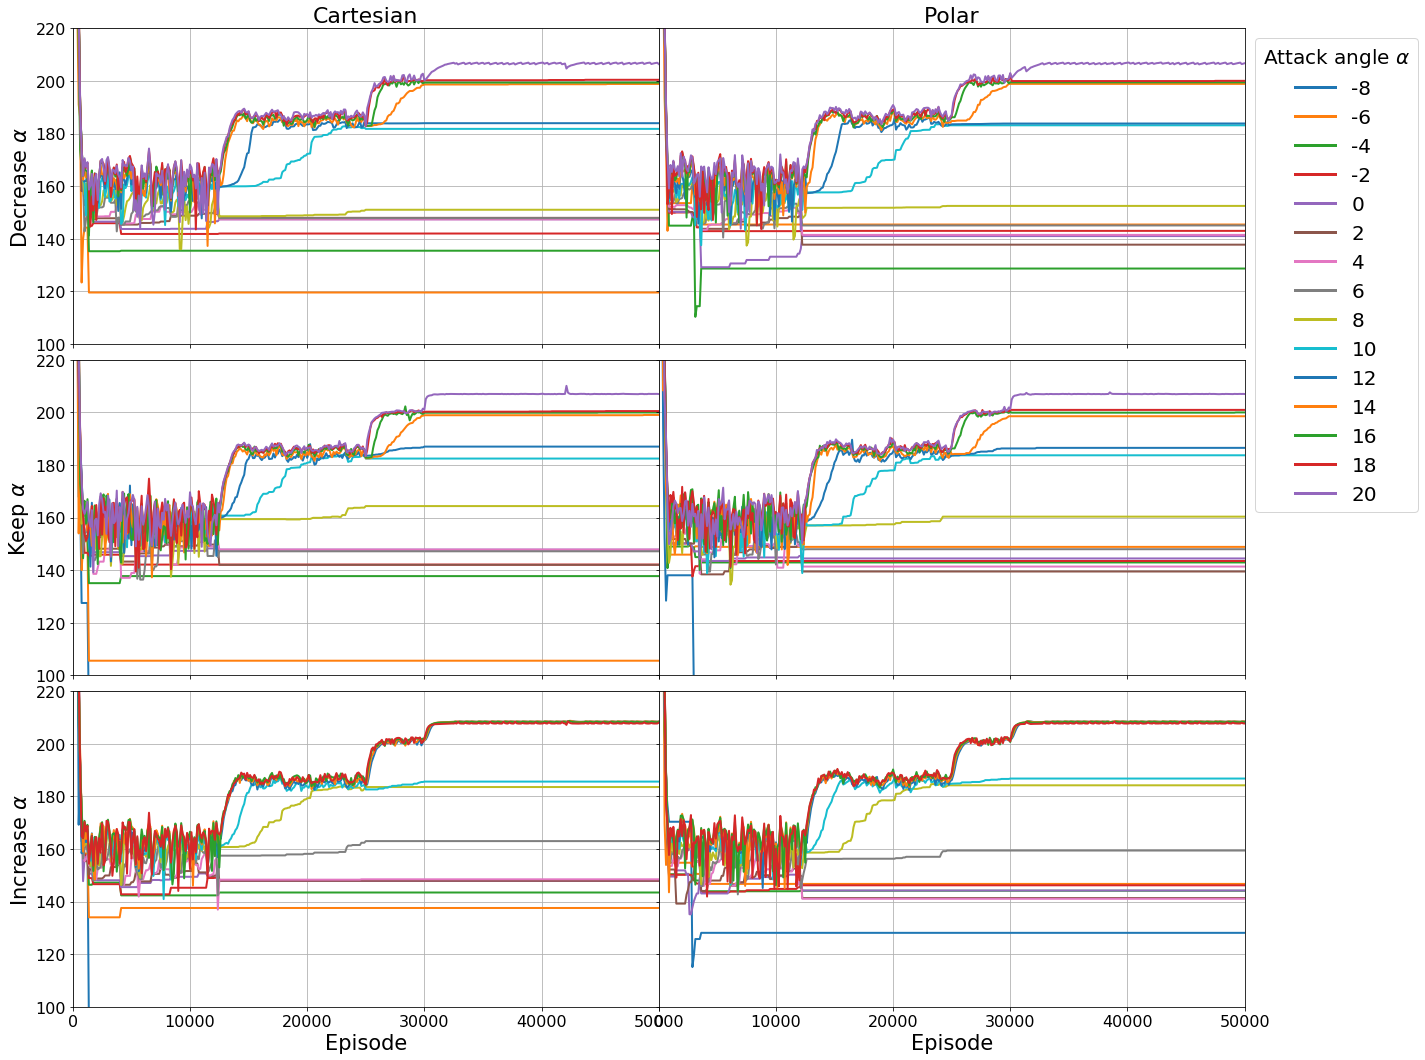

In [4]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(21, 18), 
                        gridspec_kw={'wspace': 0.0, 'hspace':0.05})
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axs
ep_max = cQ['episode'].max()

actions = ['action_0', 'action_1', 'action_2']

#sns.set()

colors1 = cm.tab20c(np.linspace(0, 1, n_alphas)) # prism

#fig.suptitle("Q entry values for each alpha, for actions 0, 1, 2 ", fontsize = title_fs)

#colors = ['darkorange', 'rosybrown', 'yellow', 'purple', 'turquoise', 'brown', 'mediumorchid', 'chocolate', 'darkolivegreen', \
#         'hotpink', 'dodgerblue', 'green', 'darkslategrey', 'red', 'royalblue']

#colors1 = ['green', 'blue', 'rosybrown', 'purple', 'turquoise', 'brown', 'mediumorchid', 'hotpink', 'darkolivegreen', \
#         'gold', 'dodgerblue', 'chocolate', 'darkslategrey', 'royalblue', 'tab:red','darkorange']

for alph in range(0,len(alphas)):
    
    df = cQ.loc[cQ['alpha_idx'] == alph]

    ax1.plot(df['episode'], df['action_0'], label = str(alphas[alph]), linewidth=2)#, color = colors1[alph])#, linewidth=2)
    ax3.plot(df['episode'], df['action_1'], label = str(alphas[alph]), linewidth=2)#, color = colors1[alph])#, linewidth=2)
    ax5.plot(df['episode'], df['action_2'], label = str(alphas[alph]), linewidth=2)#, color = colors1[alph])#, linewidth=2)
    
    df1 = pQ.loc[cQ['alpha_idx'] == alph]
        
    ax2.plot(df1['episode'], df1['action_0'], label = str(alphas[alph]), linewidth=2)#, color = colors1[alph])
    ax4.plot(df1['episode'], df1['action_1'], label = str(alphas[alph]), linewidth=2)#, color = colors1[alph])
    ax6.plot(df1['episode'], df1['action_2'], label = str(alphas[alph]), linewidth=2)#, color = colors1[alph])
    
ax1.set_xlim(0,50000)
ax1.set_xticks([0, 10000, 20000, 30000, 40000, 50000])


ax1.set_ylabel(r'Decrease $\alpha$', fontsize = label_fs+5)
ax3.set_ylabel(r'Keep $\alpha$', fontsize = label_fs+5)
ax5.set_ylabel(r'Increase $\alpha$', fontsize = label_fs+5)

ax1.set_ylim(100,220)

ax1.grid(b=True)
ax2.grid(b=True)
ax3.grid(b=True)
ax4.grid(b=True)
ax5.grid(b=True)
ax6.grid(b=True)

ax1.tick_params(axis='both', which='major', labelsize=16)
ax3.tick_params(axis='both', which='major', labelsize=16)
ax5.tick_params(axis='both', which='major', labelsize=16)
ax6.tick_params(axis='both', which='major', labelsize=16)

leg = ax2.legend(bbox_to_anchor=(1., 1.), fontsize=20, title=r'Attack angle $\alpha$', title_fontsize=20)

for legobj in leg.legendHandles:
    legobj.set_linewidth(3)
ax5.set_xlabel('Episode', fontsize = label_fs+5)
ax6.set_xlabel('Episode', fontsize = label_fs+5)

ax1.set_title("Cartesian", fontsize = fs+7)
ax2.set_title("Polar", fontsize = fs+7)
    
#fig.savefig('growingmatrix-2d-const-wind-cartpol.png', dpi=200, bbox_inches='tight')

In [60]:
cQ = pd.read_csv("cQ_matrix_newcoeff.txt")
pQ = pd.read_csv("pQ_matrix_newcoeff.txt")

last_ep = cQ.episode.max()
cQ_last = cQ[cQ['episode'] == last_ep]
pQ_last = pQ[pQ['episode'] == last_ep]

df1 = cQ_last[['action_0','action_1', 'action_2']]
df2 = pQ_last[['action_0','action_1', 'action_2']]

vmin = 0
vmax = max(df1['action_0'].max(), df2['action_0'].max(),
          df1['action_1'].max(), df2['action_1'].max(),
          df1['action_2'].max(), df2['action_2'].max())


cQ_last.tail(2)

,episode,alpha_idx,action_0,action_1,action_2
6013,49999,13,200.429,200.486044,208.006
6014,49999,14,206.436,206.958587,


In [45]:
df1 = cQ_last[['action_0','action_1', 'action_2']]

polic = {}
for a, row in enumerate(df1.iterrows()):
    #print(a, row)
    m_tmp = 0
    for i in range(3):
        if (row[1][i] > row[1][m_tmp]):
            m_tmp = i
    polic[a] = m_tmp
    #print("zero,",row[1][1], "\n\n")
    
polic

{0: 2,
 1: 2,
 2: 2,
 3: 2,
 4: 2,
 5: 0,
 6: 2,
 7: 2,
 8: 2,
 9: 2,
 10: 2,
 11: 2,
 12: 2,
 13: 2,
 14: 1}

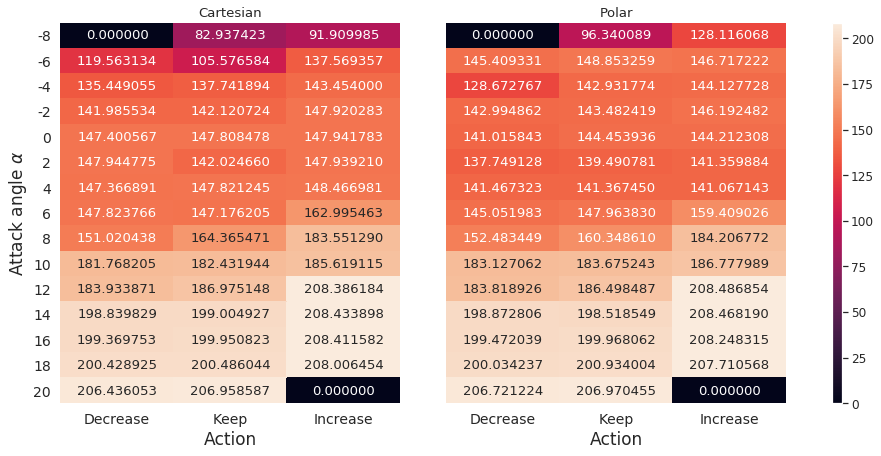

In [63]:
import seaborn as sns

cQ = pd.read_csv("cQ_matrix_newcoeff.txt")
pQ = pd.read_csv("pQ_matrix_newcoeff.txt")

last_ep = cQ.episode.max()
cQ_last = cQ[cQ['episode'] == last_ep]
pQ_last = pQ[pQ['episode'] == last_ep]

df1 = cQ_last[['action_0','action_1', 'action_2']]
df2 = pQ_last[['action_0','action_1', 'action_2']]

vmin = 0
vmax = max(df1['action_0'].max(), df2['action_0'].max(),
          df1['action_1'].max(), df2['action_1'].max(),
          df1['action_2'].max(), df2['action_2'].max())

#print(vmax)

fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[7,7,0.2]),figsize=(14, 7))
sns.set(font_scale=1.1)
sns.heatmap(df1, annot=True, fmt="f", cbar=False, ax=axs[0], vmin=vmin)
sns.heatmap(df2, annot=True, fmt="f", yticklabels=False, cbar=False, ax=axs[1], vmax=vmax)
axs[0].set_yticklabels(alphas)
axs[0].set_ylabel(r'Attack angle $\alpha$',fontsize=17)
axs[0].set_xlabel("Action",fontsize=17)
axs[1].set_xlabel("Action",fontsize=17)
axs[0].set_xticklabels(["Decrease", "Keep", "Increase"])
axs[1].set_xticklabels(["Decrease", "Keep", "Increase"])
axs[0].tick_params(labelsize=14)
axs[1].tick_params(labelsize=14)

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

fig.colorbar(axs[1].collections[0], cax=axs[2])

plt.show()

#fig = plt.get_figure()
#fig.savefig('Q_matrix.png', dpi=200, bbox_inches="tight")

## 2) Rewards

In [13]:
crew.tail(3)

,episode,epsilon,Alpha,steps,return
49997,49997,0.0001,0.01,2000001,210.53333
49998,49998,0.0001,0.01,2000001,210.53333
49999,49999,0.0000,0.01,2000001,210.53333


In [14]:
crew.iloc[14999:15000]

,episode,epsilon,Alpha,steps,return
14999,14999,0.05,0.01,2000001,192.355237


In [7]:
changes_cart = [0] + [idx for idx, (i, j) in enumerate(zip(crew['Alpha'], crew['Alpha'][1:]), 1) if i != j]
print(changes_cart)
changes_pol = [0] + [idx for idx, (i, j) in enumerate(zip(prew['Alpha'], prew['Alpha'][1:]), 1) if i != j]
print(changes_pol)

[0, 12500]
[0, 12500]


In [8]:
crew.Alpha.ne(0.001).idxmax() == prew.Alpha.ne(0.001).idxmax()

True

In [9]:
changes_pol = [0] + [idx for idx, (i, j) in enumerate(zip(prew['epsilon'], prew['epsilon'][1:]), 1) if i != j]
print(changes_pol)

[0, 12500, 25000, 30000, 49999]


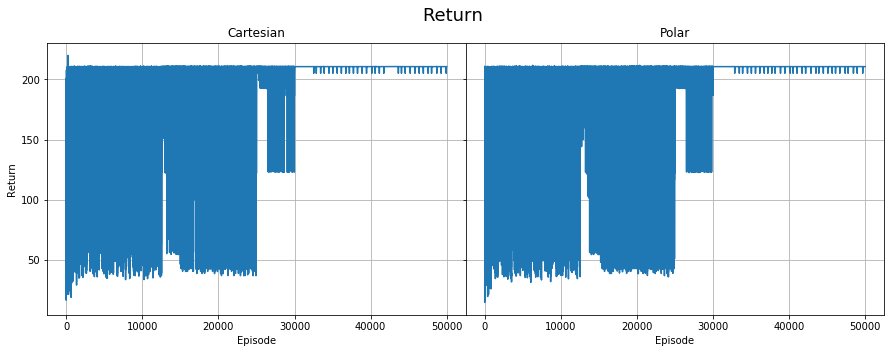

In [7]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

fig.suptitle("Return", fontsize = title_fs)

axs[0].plot(crew['episode'], crew['return'])
axs[0].grid(b=True)

axs[1].plot(prew['episode'], prew['return'])
axs[1].grid(b=True)

#axs[0].legend(title = r'Wind (m/s)', fontsize = legend_fs, loc='upper left', prop={"size":9})
axs[0].set_ylabel('Return')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Episode')

In [10]:
cout.tail(5)

,t,x_kite,z_kite,x_block,z_block,theta,vtheta,windx,windy,v_block,Tension
1996,1996000,220.310160,48.956227,210.147099,0.0,1.366109,-0.0,10.0,0.0,0.868374,263.837761
1997,1997000,220.396998,48.956227,210.233936,0.0,1.366109,-0.0,10.0,0.0,0.868374,263.837761
1998,1998000,220.483835,48.956227,210.320773,0.0,1.366109,-0.0,10.0,0.0,0.868374,263.837761
1999,1999000,220.570672,48.956227,210.407611,0.0,1.366109,-0.0,10.0,0.0,0.868374,263.837761
2000,2000000,220.657510,48.956227,210.494448,0.0,1.366109,-0.0,10.0,0.0,0.868374,263.837761


## Mean growth of returns

250


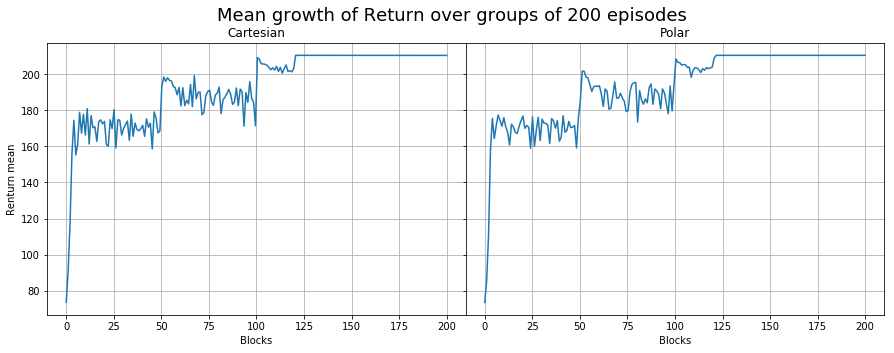

In [6]:
num_blocks = 200
data_per_block = int(len(crew)/num_blocks)

print(data_per_block)
cmean = []
pmean = []
for i in range(0,num_blocks):
    #print(i*n_data,i*n_data+n_data)
    cmean.append(np.mean(crew['return'][i*data_per_block:i*data_per_block+data_per_block]))
    pmean.append(np.mean(prew['return'][i*data_per_block:i*data_per_block+data_per_block]))
    
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

fig.suptitle('Mean growth of Return over groups of ' + str(num_blocks) + ' episodes', fontsize = title_fs)

axs[0].plot(np.linspace(0, num_blocks, num_blocks), cmean)
axs[0].grid(b=True)

axs[1].plot(np.linspace(0, num_blocks, num_blocks), pmean)
axs[1].grid(b=True)

axs[0].set_ylabel('Renturn mean')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

for ax in axs.flat:
    ax.set(xlabel='Blocks')
    
#fig.savefig('mean_return.png', dpi=400)

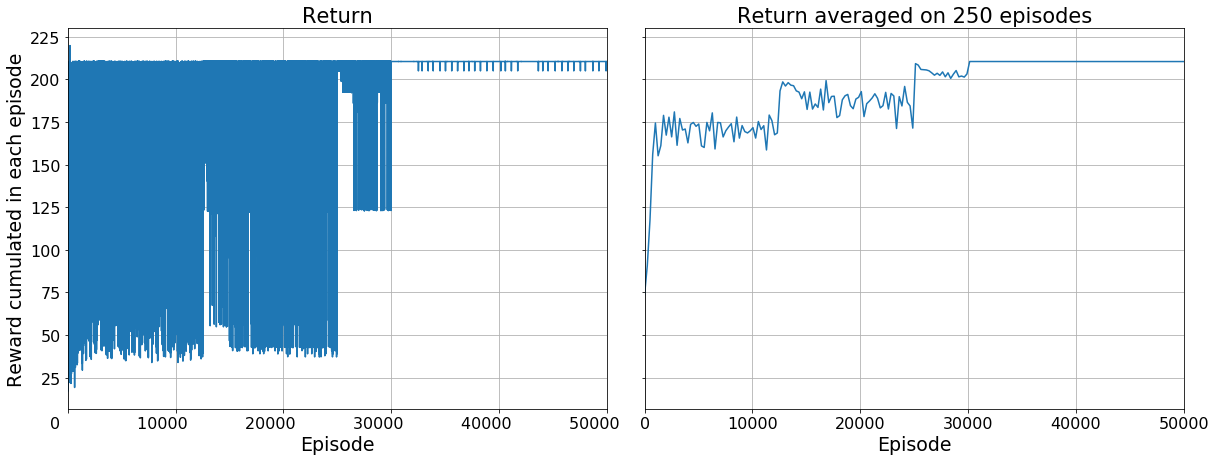

In [7]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7), sharey=True, gridspec_kw={'wspace': 0.07})

#fig.suptitle("Return", fontsize = title_fs)

axs[0].plot(crew['episode'], crew['return'])
axs[0].set_title("Return", fontsize=21)
axs[0].grid(b=True)
axs[0].set_xlim(-0.5, 50000)
axs[0].set_xlabel("Episode", fontsize=19)
axs[0].tick_params(axis='both', labelsize=16)
axs[0].set_ylabel("Reward cumulated in each episode", fontsize=19)
axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: ('%g     ') % (x)))

axs[1].plot(np.linspace(0, num_blocks, num_blocks), cmean)
axs[1].set_title("Return averaged on " + str(data_per_block) + " episodes", fontsize=21)
axs[1].set_xlabel("Episode", fontsize=19)
axs[1].tick_params(axis='both', labelsize=16)
axs[1].set_xlim(1, num_blocks)
#axs[1].set_ylim(0, 225)
axs[1].set_xticks([0, 40, 80, 120, 160, 200])
axs[1].set_xticklabels([0,10000, 20000, 30000, 40000, 50000])
#axs[1].set_xticklabels([0,10000, 20000, 30000, 40000, 50000])#ticker.FuncFormatter(lambda x, pos: ('%g') % (x * data_per_block)))
#axs[1].set_xticks(axs[0].get_xticks())
axs[1].grid(b=True)

#plt.savefig('returns.png', bbox_inches='tight', dpi=200)

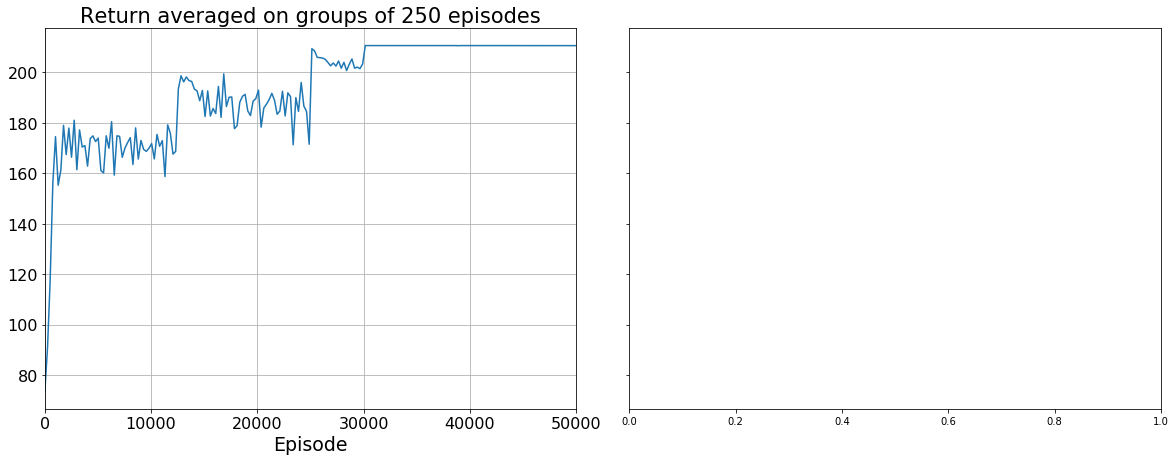

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7), sharey=True, gridspec_kw={'wspace': 0.1})

#fig.suptitle("Return", fontsize = title_fs)

"""axs[0].plot(crew['episode'], crew['return'])
axs[0].set_title("Return", fontsize=21)
axs[0].grid(b=True)
axs[0].set_xlim(-0.5, 50000)
axs[0].set_xlabel("Episode", fontsize=19)
axs[0].tick_params(axis='both', labelsize=16)
axs[0].set_ylabel("Reward cumulated in each episode", fontsize=19)
axs[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: ('%g     ') % (x)))
"""
axs[0].plot(np.linspace(0, num_blocks, num_blocks), cmean)
axs[0].set_title("Return averaged on groups of " + str(data_per_block) + " episodes", fontsize=21)
axs[0].set_xlabel("Episode", fontsize=19)
axs[0].tick_params(axis='both', labelsize=16)
axs[0].set_xlim(1, num_blocks)
#axs01].set_ylim(0, 225)
axs[0].set_xticks([0, 40, 80, 120, 160, 200])
axs[0].set_xticklabels([0,10000, 20000, 30000, 40000, 50000])
#axs[1].set_xticklabels([0,10000, 20000, 30000, 40000, 50000])#ticker.FuncFormatter(lambda x, pos: ('%g') % (x * data_per_block)))
#axs[1].set_xticks(axs[0].get_xticks())
axs[0].grid(b=True)

#plt.savefig("returnsavg.png", dpi=200)

## 3) Last iteration Policy

In [13]:
cpol.tail(3)

,step,alpha,action,reward,Q[s+0],Q[s+1],Q[s+2]
1998,1998000,20.0,1,0.086837,206.436053,209.046464,0.0
1999,1999000,20.0,1,0.086837,206.436053,209.047332,0.0
2000,2000000,20.0,1,0.086837,206.436053,209.048200,0.0


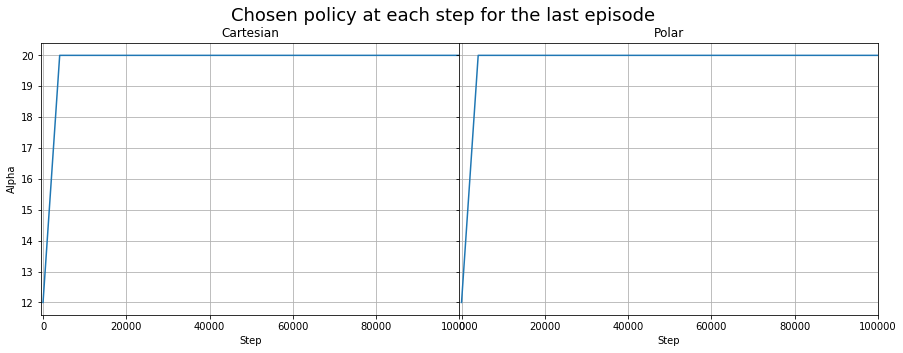

In [14]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

fig.suptitle('Chosen policy at each step for the last episode ', fontsize = title_fs)

axs[0].plot(cpol['step'], cpol['alpha'])
axs[0].grid(b=True)

axs[1].plot(ppol['step'], ppol['alpha'])
axs[1].grid(b=True)

axs[0].set_ylabel('Alpha')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

axs[0].set_xlim(-500,100000)

for ax in axs.flat:
    ax.set(xlabel='Step')
    
#fig.savefig('chosen_policy.png', dpi=400)

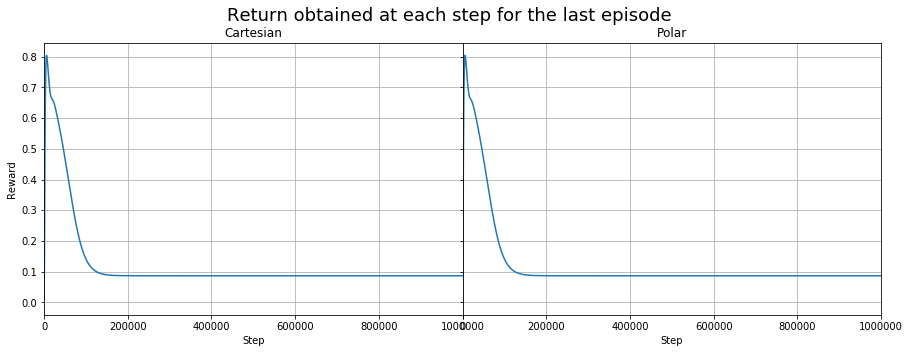

In [15]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0})

fig.suptitle('Return obtained at each step for the last episode', fontsize = title_fs)

axs[0].plot(cpol['step'], cpol['reward'])
axs[0].grid(b=True)

axs[1].plot(ppol['step'], ppol['reward'])
axs[1].grid(b=True)

axs[0].set_ylabel('Reward')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

axs[0].set_xlim(0,1000000)

for ax in axs.flat:
    ax.set(xlabel='Step')
    
#fig.savefig('reward_obtained.png', dpi=400)

## 4) last episode dynamics plot

In [107]:
cout.tail(3)

,t,x_kite,z_kite,x_block,z_block,theta,vtheta,windx,windy,v_block,Tension
1998,1998000,379.486257,49.489375,372.358723,0.0,1.427758,-0.0,10.0,0.0,1.658485,291.494892
1999,1999000,379.652106,49.489375,372.524571,0.0,1.427758,-0.0,10.0,0.0,1.658485,291.494892
2000,2000000,379.817954,49.489375,372.690420,0.0,1.427758,-0.0,10.0,0.0,1.658485,291.494892


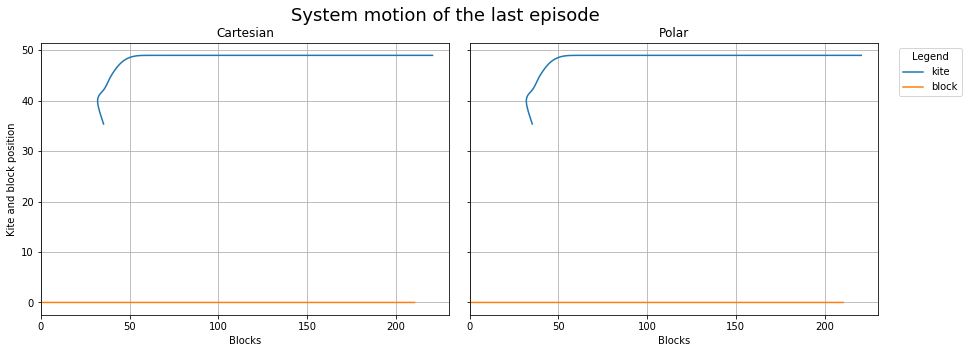

In [15]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(15, 5), gridspec_kw={'wspace': 0.05})

fig.suptitle('System motion of the last episode', fontsize = title_fs)

axs[0].plot(cout['x_kite'], cout['z_kite'],label='kite')
axs[0].plot(cout['x_block'], cout['z_block'],label='block')
axs[0].grid(b=True)

axs[1].plot(pout['x_kite'], pout['z_kite'],label='kite')
axs[1].plot(pout['x_block'], pout['z_block'],label='block')
axs[1].grid(b=True)

plt.legend(title = 'Legend', bbox_to_anchor=(1.04,1), loc="upper left")
        
axs[0].set_ylabel('Kite and block position')

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

axs[0].set_xlim(0,230)

for ax in axs.flat:
    ax.set(xlabel='Blocks')

#fig.savefig('system_trajectory.png', dpi=400)

In [29]:
#cout.tail(10)
#cpol.tail(10)

No handles with labels found to put in legend.


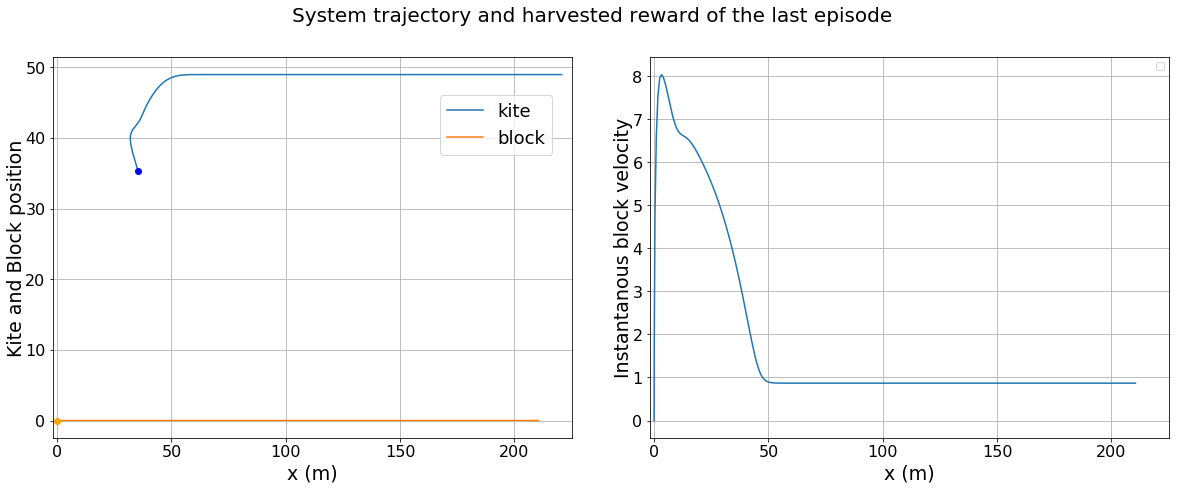

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7), gridspec_kw={'wspace': 0.15})

fig.suptitle('System trajectory and harvested reward of the last episode', fontsize = 20)

axs[0].plot(cout['x_kite'], cout['z_kite'], label='kite')
axs[0].plot(cout['x_kite'][0], cout['z_kite'][0], marker='o', color='b')
axs[0].plot(cout['x_block'], cout['z_block'], label='block')
axs[0].plot(cout['x_block'][0]+0.05, cout['z_block'][0], marker='o', color='orange')
axs[0].grid(b=True)
plt.legend( loc="upper right")

axs[1].plot(cout['x_block'], cpol['reward']*10)
axs[1].grid(b=True)

axs[0].set_xlim(-2,225)
axs[1].set_xlim(-2,225)

axs[0].tick_params(axis='both', labelsize=16)
axs[1].tick_params(axis='both', labelsize=16)

axs[0].legend(loc=4,mode="", borderaxespad=.5, frameon=True,
        bbox_to_anchor=(-0.02, 0.72, 1., .102), fontsize=18)

#axs[0].set_title("Trajectory", fontsize=20, pad=10)
#axs[1].set_title("Reward", fontsize=20, pad=3)

axs[0].set_ylabel("Kite and Block position", fontsize=19, labelpad=-1)
axs[1].set_ylabel("Instantanous block velocity", fontsize=19,labelpad=-1)


axs[0].set_xlabel("x (m)", fontsize=19)
axs[1].set_xlabel("x (m)", fontsize=19)

#fig.savefig('trajectory_reward_realv.png', dpi=200, bbox_inches = 'tight')

## 6) Q matrix counter

In [56]:
pQ_count.head(5)

,episode,alpha_idx,action_0,action_1,action_2
0,49999,0,0,540,525
1,49999,1,539,1028,2686
2,49999,2,2731,20444,15106
3,49999,3,15169,37289,17134
4,49999,4,17240,32152,19613


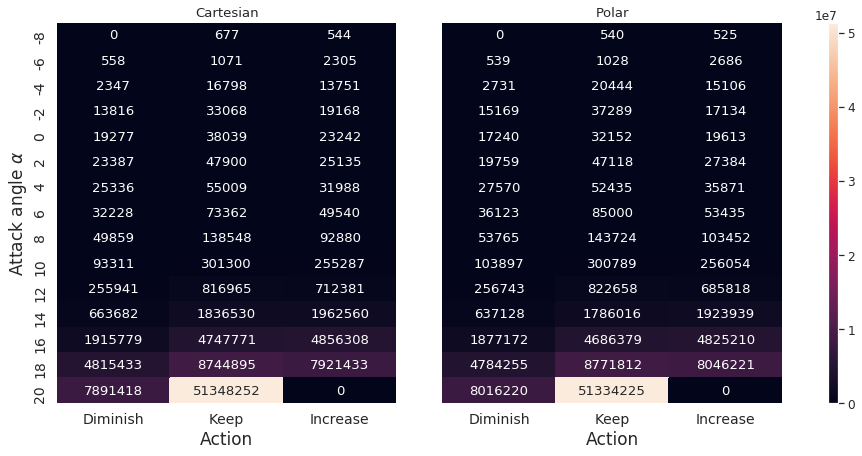

In [57]:
df1 = cQ_count[['action_0','action_1', 'action_2']]
df2 = pQ_count[['action_0','action_1', 'action_2']]

vmin = 0
vmax = max(df1['action_0'].max(), df2['action_0'].max(),
          df1['action_1'].max(), df2['action_1'].max(),
          df1['action_2'].max(), df2['action_2'].max())
#print(vmax)

fig, axs = plt.subplots(ncols=3, gridspec_kw=dict(width_ratios=[7,7,0.2]),figsize=(14, 7))
sns.set(font_scale=1.1)
sns.heatmap(df1, annot=True, fmt="d", cbar=False, ax=axs[0], vmin=vmin)
sns.heatmap(df2, annot=True, fmt="d", yticklabels=False, cbar=False, ax=axs[1], vmax=vmax)
axs[0].set_yticklabels(alphas)
axs[0].set_ylabel(r'Attack angle $\alpha$',fontsize=17)
axs[0].set_xlabel("Action",fontsize=17)
axs[1].set_xlabel("Action",fontsize=17)
axs[0].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[1].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[0].tick_params(labelsize=14)
axs[1].tick_params(labelsize=14)

axs[0].set_title("Cartesian")
axs[1].set_title("Polar")

fig.colorbar(axs[1].collections[0], cax=axs[2])

plt.show()

#fig = plt.get_figure()
#fig.savefig('cQ_matrix_counter.png', dpi=400)

In [11]:
df1 = cQ_last[['action_0','action_1', 'action_2']]
df2 = pQ_last[['action_0','action_1', 'action_2']]

vmin1 = 0
vmax1 = max(df1['action_0'].max(), df2['action_0'].max(),
          df1['action_1'].max(), df2['action_1'].max(),
          df1['action_2'].max(), df2['action_2'].max())

df3 = cQ_count[['action_0','action_1', 'action_2']]
df4 = pQ_count[['action_0','action_1', 'action_2']]

vmin2 = 0
vmax2 = max(df3['action_0'].max(), df4['action_0'].max(),
          df3['action_1'].max(), df4['action_1'].max(),
          df3['action_2'].max(), df4['action_2'].max())
#print(vmax)

fig, axs = plt.subplots(2, ncols=3, #sharex=True, 
                        gridspec_kw=dict(wspace=0.08, hspace=0.05, width_ratios=[7,7,0.2], height_ratios=[1,1]), 
                        figsize=(13, 15))
sns.set(font_scale=1.1)

sns.heatmap(df1, annot=True, fmt="f", cbar=False, ax=axs[0,0], vmin=vmin1)
sns.heatmap(df2, annot=True, fmt="f", yticklabels=False, cbar=False, ax=axs[0,1], vmax=vmax1)

sns.heatmap(df3, annot=True, fmt="d", cbar=False, ax=axs[1,0], vmin=vmin2)
sns.heatmap(df4, annot=True, fmt="d", yticklabels=False, cbar=False, ax=axs[1,1], vmax=vmax2)

axs[0,0].set_yticklabels(alphas,rotation='horizontal')
axs[0,0].set_ylabel(r'Attack angle $\alpha$',fontsize=19)

axs[1,0].set_yticklabels(alphas,rotation='horizontal')
axs[1,0].set_ylabel(r'Attack angle $\alpha$',fontsize=19)

axs[0,0].set_xticklabels(["", "", ""])
axs[0,1].set_xticklabels(["", "", ""])
axs[1,0].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[1,1].set_xticklabels(["Diminish", "Keep", "Increase"])

axs[1,0].set_xlabel("Action",fontsize=19, labelpad=10)
axs[1,1].set_xlabel("Action",fontsize=19, labelpad=10)

axs[0,0].tick_params(labelsize=14)
axs[0,1].tick_params(labelsize=14)
axs[1,0].tick_params(labelsize=14)
axs[1,1].tick_params(labelsize=14)

axs[0,0].set_title("Cartesian", fontsize=17)
axs[0,1].set_title("Polar", fontsize=17)

fig.colorbar(axs[0,1].collections[0], cax=axs[0,2])
fig.colorbar(axs[1,1].collections[0], cax=axs[1,2])

plt.show()
#fig.savefig('matrix-and-counter-both.png', bbox_inches='tight', dpi=200)

NameError: name 'cQ_last' is not defined

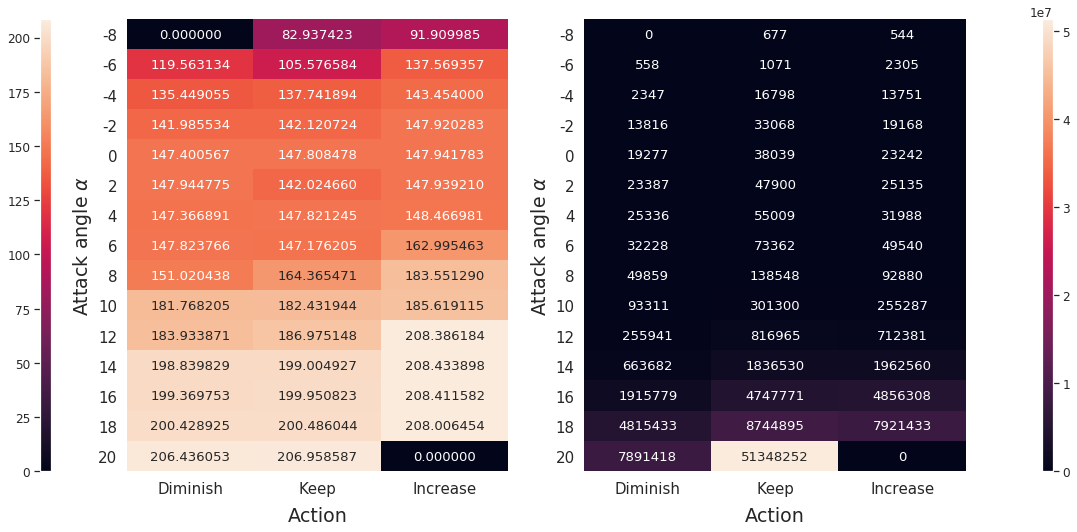

In [60]:
fig, axs = plt.subplots(1, ncols=4, #sharex=True, 
                        gridspec_kw=dict( width_ratios=[0.2,7,7,0.2], height_ratios=[1]), 
                        figsize=(15, 7.5))

sns.heatmap(df1, annot=True, fmt="f", cbar=False, ax=axs[1], vmin=vmin1)
sns.heatmap(df3, annot=True, fmt="d", cbar=False, ax=axs[2], vmin=vmin2)

axs[1].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[2].set_xticklabels(["Diminish", "Keep", "Increase"])
axs[1].set_yticklabels(alphas,rotation='horizontal')
axs[2].set_yticklabels(alphas,rotation='horizontal')

axs[1].set_xlabel("Action",fontsize=19, labelpad=10)
axs[2].set_xlabel("Action",fontsize=19, labelpad=10)

axs[1].tick_params(labelsize=15)
axs[2].tick_params(labelsize=15)

axs[1].set_ylabel(r'Attack angle $\alpha$',fontsize=19)
axs[2].set_ylabel(r'Attack angle $\alpha$',fontsize=19)

fig.colorbar(axs[1].collections[0], cax=axs[0], fraction=0.046,pad=1)
axs[0].yaxis.set_ticks_position('left')
fig.tight_layout() 
fig.colorbar(axs[2].collections[0], cax=axs[3])

#fig.savefig('matrix-and-counter-partial.png', bbox_inches='tight', dpi=500)

# GIF

In [4]:
def divide(x):

    return x/10000


cout['t'] = cout['t'].apply(divide)
cout.tail(4)
cpol.tail(4)
#cout.insert("time", t/1000, True) 

,step,alpha,action,reward,Q[s+0],Q[s+1],Q[s+2]
1997,1997000,20.0,1,0.086837,206.436053,209.045595,0.0
1998,1998000,20.0,1,0.086837,206.436053,209.046464,0.0
1999,1999000,20.0,1,0.086837,206.436053,209.047332,0.0
2000,2000000,20.0,1,0.086837,206.436053,209.048200,0.0


In [5]:
data_gen0 = []
data_gen1 = []
rew = []
tempo = []
att = []

for i in range(0,len(cout['x_kite'])):
    data_gen0.append( (list(cout['x_kite'])[i], list(cout['z_kite'])[i] )) 
    data_gen1.append( (list(cout['x_block'])[i], list(cout['z_block'])[i] )) 
    rew.append( (list(cout['x_block'])[i], list(cpol['reward'])[i] )) 
    tempo.append(list(cout['t'])[i])
    att.append(list(cpol['alpha'])[i])

maxtime = cout['t'].max()
print(maxtime)

200.0


In [6]:
print(len(data_gen0))
print(len(data_gen1))
print(len(rew))
print(len(tempo))
print(len(att))

2001
2001
2001
2001
2001


0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276


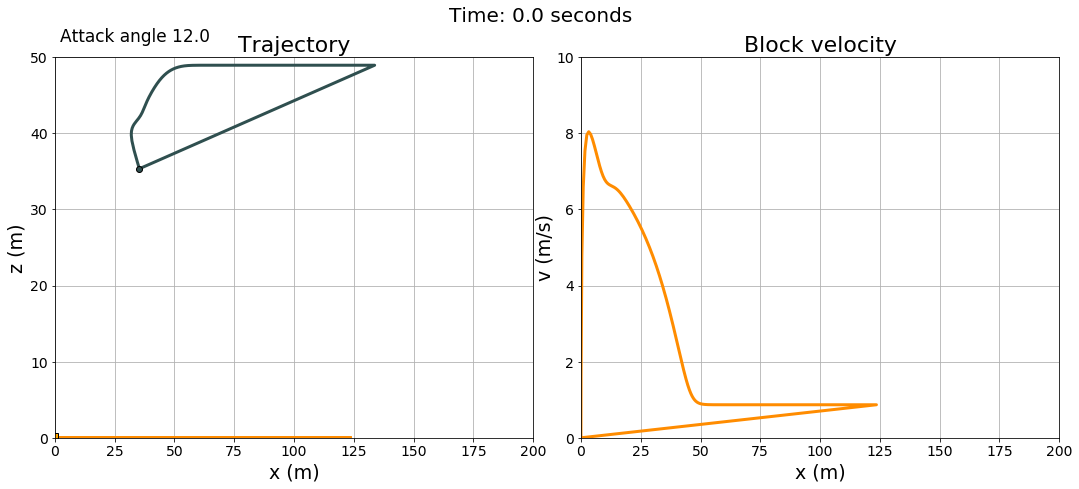

In [10]:
maxdata = 1000
data_gen01 = data_gen0[0:maxdata]
data_gen11 = data_gen1[0:maxdata]
rew1 = rew[0:maxdata]
tempo1 = tempo[0:maxdata]

fig = plt.figure(figsize=(18,7))
fig.suptitle("Time: 0.0 seconds", fontsize=20)
gs = gridspec.GridSpec(1,2, width_ratios=[1,1]) 
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
fig.subplots_adjust(wspace=0.1)

line, = ax1.plot([], [], lw=3, color='darkslategrey')
line1, = ax1.plot([], [], lw=3, color='darkorange')
line2, = ax2.plot([], [], lw=3, color='darkorange')

ax1.grid()
ax2.grid()

ax1.set_ylim(0, 50)
ax2.set_ylim(0, 10)
ax1.set_xlim(0, 200)
ax2.set_xlim(0, 200)

ax1.set_ylabel('z (m)',fontsize=19)
ax1.set_xlabel('x (m)',fontsize=19)
ax2.set_ylabel('v (m/s)',fontsize=19, labelpad=2)
ax2.set_xlabel('x (m)',fontsize=19)
ax1.set_title("Trajectory",fontsize=22)
ax2.set_title("Block velocity",fontsize=22)

ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

xdata=[]
ydata=[]
xbldata=[]
ybldata=[]
rews=[]

x_kite0, y_kite0 = data_gen01[0]
x_block0, y_block0 = data_gen11[0]

point, = ax1.plot(x_kite0, y_kite0, markerfacecolor='darkslategrey', 
                 markeredgecolor='k', marker = "o", markersize=6)
point1, = ax1.plot(x_block0, y_block0+0.15, markerfacecolor='orange', 
                 markeredgecolor='k', marker = "s", markersize=6)

ann = ax1.text(2, 52, s = "Attack angle {:.1f}".format(att[0]), fontsize=17)

def update(num):
    print(num)
    x_kite, y_kite = data_gen01[num]
    x_block, y_block = data_gen11[num]
    _, rewww = rew1[num]
    
    xdata.append(x_kite)
    ydata.append(y_kite)
    xbldata.append(x_block)
    ybldata.append(y_block+0.15)
    rews.append(rewww*10)
    
    line.set_data([xdata], [ydata])
    line1.set_data([xbldata], [ybldata])
    line2.set_data([xbldata], [rews])
    
    point.set_data(x_kite, y_kite)
    point1.set_data(x_block, y_block+0.2)
    
    global ann
    alph = att[num]
    ann.remove()
    ann = ax1.text(2, 52, s = "Attack angle {:.1f}".format(alph), fontsize=17)
    
    fig.suptitle("Time: " + str(tempo1[num]) + " seconds", fontsize=20)
        
    return line,

line_ani = animation.FuncAnimation(fig, update, range(int(maxdata)),
                                   interval=500)#, blit=True)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=20, metadata=dict(artist='Me'), bitrate=1800)
line_ani.save('animation3.mp4', writer=writer, dpi=300)
print("finito")